# Chapter 01 신경망 복습

## 1.1 수학과 파이썬 복습

### 1.1.1 벡터 행렬
벡터는 행백터(가로)로 표기한다.


In [9]:
import numpy as np 
x = np.array([1,2,3])
print(x.__class__)

<class 'numpy.ndarray'>


In [11]:
x.shape

(3,)

In [13]:
x.ndim

1

In [14]:
W = np.array([[1,2,3], [4,5,6]])

In [15]:
W.shape

(2, 3)

In [16]:
W.ndim

2

### 1.1.2 행렬의 원소별 연산

In [17]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [18]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

곱하기가 행렬의 곱셈이 아니라 원소별 곱셈이다.

### 1.1.3 브로드케스트

In [19]:
A = np.array([[1,2],[3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [20]:
A * 10

array([[10, 20],
       [30, 40]])

In [21]:
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

브로드캐스트 기능을 이용하면 형태가 다른 행렬끼리의 곱도 정의된다.(broadcast: 흩뿌리다, 전파하다)\
스칼라 값은 행렬의 각각 원소와 곱해지고\
행벡터는 크기가 세로로 늘어난다.

### 1.1.4 벡터의 내적, 행렬의 곱

In [28]:
# inner product
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [29]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

numpy에 익숙해지기 위해서 저자는 '100 numpy exercise'를 추천한다.

### 1.1.5 행렬의 형상 확인
행렬의 곱에서는 행렬의 형상이 중요하다.

## 1.2 신경망 추론
신경망은 '학습'과 '추론'을 한다. 이번 절에는 추론에 집중한다.\
'입력층', '은닉층', '출력층'을 나타내는 뉴런들이 있다.\
뉴런과 뉴련 사이에는 '가중치'를 가지는 화살표가 있다.\
이전 층의 값과는 상관없이 더해지는 값은 '편향'이다.\
완전연결계층은 행렬의 곱으로 표현될 수 있다\
h = xW + b

x(1,2) * W(2,4) = h(1,4)임에 주목하자.\
입력이 한번에 많이 들어온다면\
x(N,2) * W(2,4) = h(N,4)역시 가능하다.


In [31]:
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)
h = np.matmul(x, W1) + b1
#b1의 형상이 맞지 않아도 자동으로 브로드캐스팅 된다.

In [32]:
h.shape

(10, 4)

완전연결계층은 선형변환이다. 시그모이드 함수를 이용해서 비선형적 요소를 추가할 수 있다.

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
a = sigmoid(h)

In [36]:
x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

In [37]:
s.shape

(10, 3)

### 1.2.2 계층으로 클래스화 및 순전파 구현
아핀 계층과 시그모이드 계층으로 나눠서 구현한다.\
앞으로 모든 계층은 두가지 규칙을 따른다
1. 모든 계층은 forward()와 backward() 메서드를 가진다.
2. 모든 계층은 인스턴스 변수인 params와 grads를 가진다.


In [19]:
class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out
    
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,):
        I, H, O = input_size, hidden_size, output_size

        #가중치와 편향 초기화
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        
        #계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        #모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [20]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

In [21]:
print(s)

[[-0.88025332 -0.60478639  0.46953247]
 [-0.83562504 -0.6809624   0.70074766]
 [-0.82817573 -0.98975401  1.17693695]
 [-0.91701554 -0.72134626  0.49504804]
 [-0.94548265 -0.36045017  0.24451613]
 [-0.89700866 -0.51019674  0.47772607]
 [-0.91443861 -0.45377777  0.38091591]
 [-1.0286619  -0.14153871 -0.22477472]
 [-0.89399336 -0.59858252  0.4334026 ]
 [-0.79317859 -0.93284147  1.03382379]]


In [ ]:
import forward_net
x = np.random.randn(10,2)
model = forward_net.TwoLayerNet(2,4,3)
s = model.predict(x)

## 1.3 신경망의 학습
### 1.3.1 손실함수


softmax와 CrossEntropyError함수를 기억하자.\
common/layers에 구현되어있다.

### 1.3.2 미분과 기울기
L(scalar), v(vector)
L = f(v) 
dL/dv = (dL/dv1, dL/dv2, ..., dL/dvn)

W(m*n 행렬)
L = g(W)
dL/dW 도 비슷하게 정의된다. 
행렬의 기울기는 행렬과 형태가 같다.

### 1.3.3 연쇄법칙
덧셈, 곱셈, 분기, repeat, sum, MatMul 노드 들에 대한 전파/역전파\
분기 노드는 역전파 할 때 더한다.\
repeat 노드는 N개로 분기하는 노드를 말한다.\
repeat 노드의 역전파는 sum이다.\
sum 노드의 역전파는 repeat이다.

In [3]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1,D)
y = np.repeat(x,N,axis = 0)
dy = np.random.randn(N,D)
dx = np.sum(dy, axis = 0, keepdims =True)

In [3]:
import sys, os
sys.path.append(os.pardir)
from dataset import spiral
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)



x (300, 2)
t (300, 3)


### 1.4.2 신경망 구현
two_layer_net을 확인하자.

In [5]:
import numpy as np
np.random.permutation(30)

array([ 7, 16,  9,  0, 14,  6, 21, 22, 11, 19, 24, 23, 12, 26,  1, 13, 29,
       15, 20, 27,  3, 28,  2, 10,  5, 25, 17, 18,  4,  8])

In [9]:
%run train_custom_loop.py

| epoch 1 | iteration 10 / 10 | loss 1.125606 
| epoch 2 | iteration 10 / 10 | loss 1.125520 
| epoch 3 | iteration 10 / 10 | loss 1.116261 
| epoch 4 | iteration 10 / 10 | loss 1.116287 
| epoch 5 | iteration 10 / 10 | loss 1.112300 
| epoch 6 | iteration 10 / 10 | loss 1.138464 
| epoch 7 | iteration 10 / 10 | loss 1.159096 
| epoch 8 | iteration 10 / 10 | loss 1.108632 
| epoch 9 | iteration 10 / 10 | loss 1.117331 
| epoch 10 | iteration 10 / 10 | loss 1.128796 
| epoch 11 | iteration 10 / 10 | loss 1.116844 
| epoch 12 | iteration 10 / 10 | loss 1.108339 
| epoch 13 | iteration 10 / 10 | loss 1.087615 
| epoch 14 | iteration 10 / 10 | loss 1.076681 
| epoch 15 | iteration 10 / 10 | loss 1.044238 
| epoch 16 | iteration 10 / 10 | loss 1.034578 
| epoch 17 | iteration 10 / 10 | loss 0.957293 
| epoch 18 | iteration 10 / 10 | loss 0.918385 
| epoch 19 | iteration 10 / 10 | loss 0.924149 
| epoch 20 | iteration 10 / 10 | loss 0.868514 
| epoch 21 | iteration 10 / 10 | loss 0.849381 
|

/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


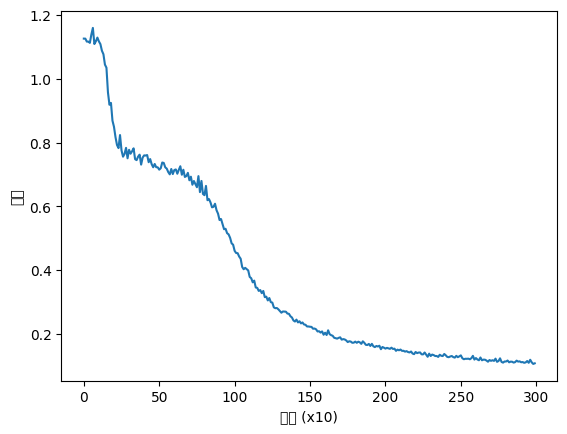

In [10]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

(-1.0223506996640548,
 1.0886493003357127,
 -0.9886726617070215,
 1.0573273382929806)

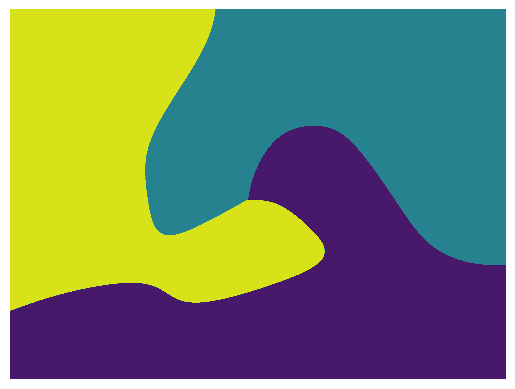

In [11]:

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

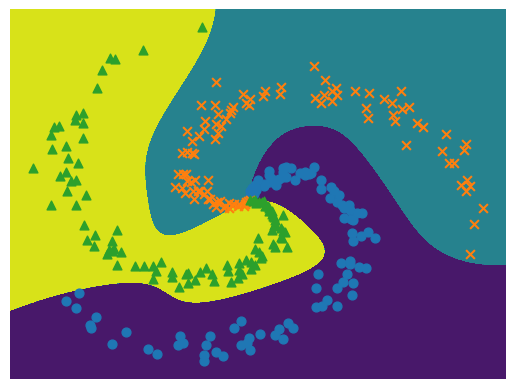

In [13]:
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')
# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### 1.4.4. Trainer Class
common/trainer.py 에 있다.\
이 클래스를 앞으로 종종 쓸 것이다.\
초기화 매서드로 신경망과 옵티마이저를 인수로 받는다.\
fit()로 학습\
x : input, t: answer, max_epoch(=10), batch_size(=32), \
eval_interval(=20): 결과를 출력하는 간격, max_grad(=None): max norm

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jsy/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


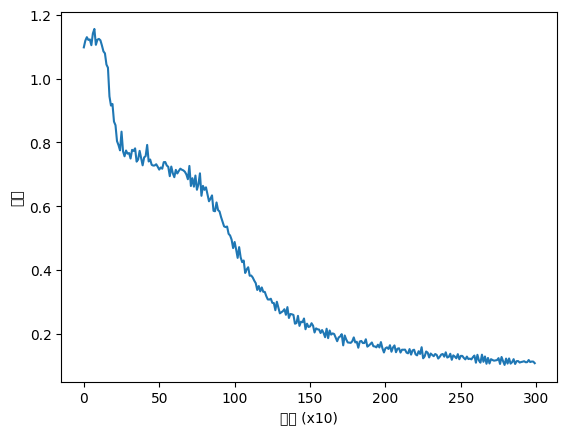

In [14]:
import sys 
sys.path.append('DeepLearningFromScratch2')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval= 10)
trainer.plot()

## 1.5 계산 고속화
'비트 정밀도'와 'GPU'에 대해서 다뤄본다.

### 1.5.1 비트 정밀도

In [15]:
import numpy as np
a = np.random.randn(3)
a

array([-0.62770321,  1.0043732 , -0.98858318])

In [16]:
a.dtype

dtype('float64')

In [19]:
b = np.random.randn(3).astype(np.float32)
print(b)
b.dtype

[0.6399222 1.2745773 1.0478756]


dtype('float32')

In [20]:
c = np.random.randn(3).astype('f')
print(c)
c.dtype

[1.5303509 1.7257342 1.0808573]


dtype('float32')

astype('f')나 astype(np.float32)를 쓰면 된다. 신경망은 적은 정밀도로 계산해도 괜찮다.

### 1.5.2 GPU(CUPY)
엔비디아의 gpu에서만 쓸 수 있다.\

In [1]:
import cupy as cp 